In [71]:
import matplotlib # импортируем библиотеку
import matplotlib.pyplot as plt # основной модуль

import numpy as np # уже знакомые нам библиотеки
import pandas as pd

import datetime # для работы со временем 

from pandas.plotting import register_matplotlib_converters # для корректной конвертации времени
register_matplotlib_converters() 

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.dates as mdates


import seaborn as sns # наводим красоту
sns.set_style('white')
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

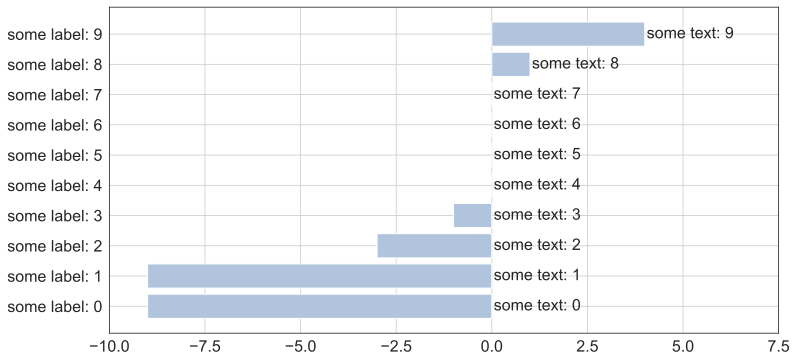

In [124]:
# Сигнатура функции и пример вывода:

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize1 = (12, 6)

def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize1):
    plt.figure(figsize=figsize1, dpi= 80)
    p1 = plt.barh(yticks_labels, bars_length, 0.8, color='lightsteelblue')
    plt.yticks(fontsize=16)
    plt.xticks(np.arange(-10,10, 2.5),fontsize=16)
    
    txt_b=list(map(lambda x: 0.05 if x<0 else x+0.05, bars_length))

    for i, lbl in enumerate(labels):
        plt.text(txt_b[i], i, lbl, horizontalalignment='left', verticalalignment='center', fontdict={'fontweight':500, 'size':16})
    plt.grid(True)
    plt.show()
    return



plot_horizontal_bar(bars_length, labels, yticks_labels, figsize1)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

<Figure size 1600x400 with 0 Axes>

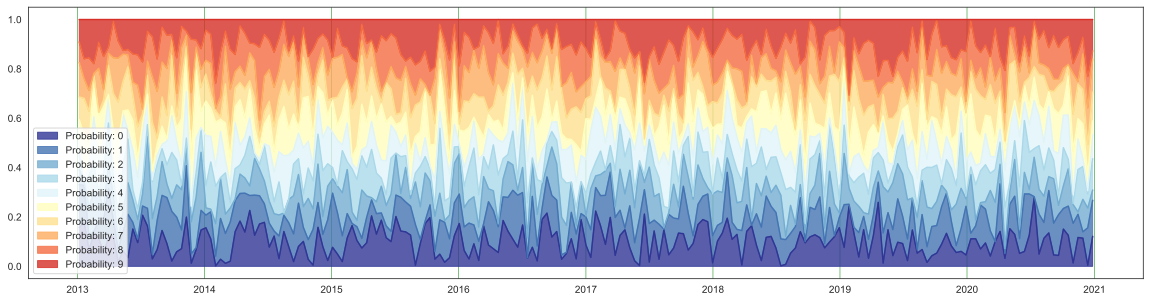

In [123]:
# Сигнатура функции и пример вывода:
dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

def plot_time_probabilities(probabilities_in_time, figsize):
    plt.figure(figsize=figsize, dpi= 80)
    labels = ['Probability: {}'.format(i) for i in range(10)]
    ts=probabilities_in_time
    cm = plt.cm.get_cmap('RdYlBu_r')
    colors=[cm(x/10) for x in range(10)]
    plt.figure(figsize=figsize)
    ts1=ts.set_axis(labels, axis=1).copy()
    plt.plot(ts1.index,ts1[labels[0]],color=colors[0])
    plt.fill_between(ts1.index, ts1[labels[0]],label=labels[0], color=colors[0],  alpha=0.8)
    plt.grid(which='major',color = 'g',linewidth = 2,axis = 'x')
    for i in range(1,10):
        ts1[labels[i]]=ts1[labels[i]]+ts1[labels[i-1]]
        plt.plot(ts1.index,ts1[labels[i]],color=colors[i])
        plt.fill_between(ts1.index,ts1[labels[i-1]], ts1[labels[i]],label=labels[i],color=colors[i],  alpha=0.8)
    plt.legend(loc='lower left')
    plt.rc('axes', axisbelow=True)
    plt.grid(which='major',color = 'g',linewidth = 0.5,axis = 'x')
    plt.show()
    return

plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

In [121]:
# Сигнатура функции и пример вывода:

intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)




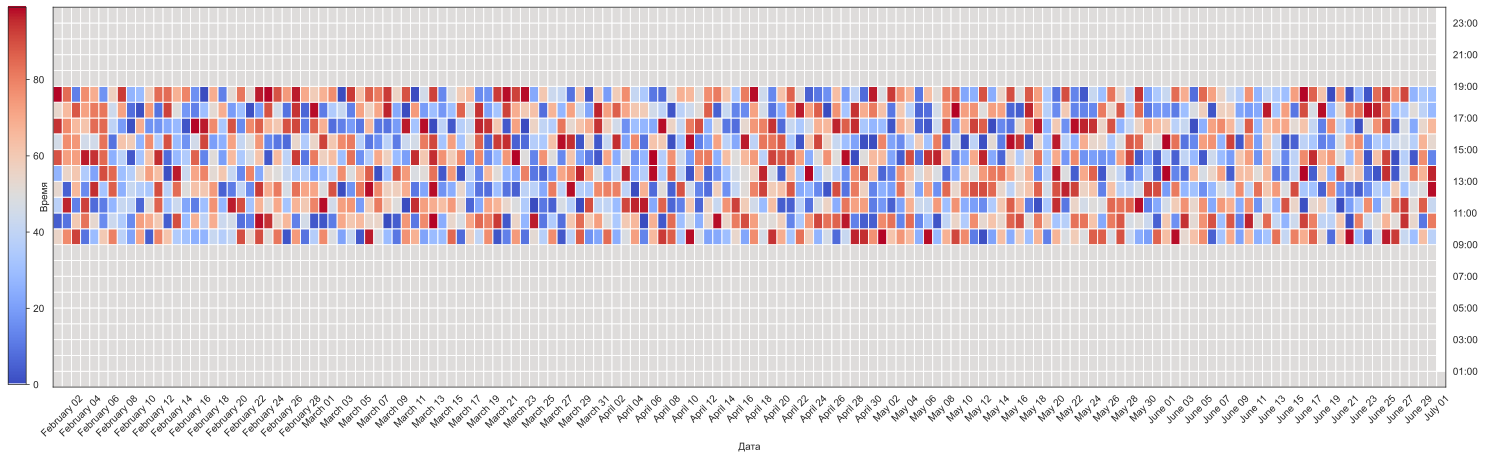

In [122]:

def plot_intraday_ts(intraday_ts, figsize):
    its=pd.DataFrame({'Дата':intraday_ts.index.date,'Время':intraday_ts.index.time,'Температура':intraday_ts.values}).copy()
    its=its.fillna(value=50)
    #готовим таблицу для вывода
    pvits = its.pivot_table(values='Температура', index='Время', columns='Дата')
    
    #готовим подписи для осей
    date_list=list(its['Дата'].unique())
    date_list = [i.strftime("%B %d") for i in date_list]
    cx=np.arange(0,len(date_list))
    date_list=date_list[1::2]
    cx=cx[1::2]
    
    time_list=list(its['Время'].unique())
    time_list = [i.strftime("%H:%M") for i in time_list]
    cy=np.arange(0,len(time_list))
    time_list=time_list[1::2]
    cy=cy[1::2]
    
    
    fig = plt.figure(figsize=figsize)
    ax0 = fig.add_subplot(111, xlabel='Дата', ylabel='Время')
    

    im=ax0.pcolormesh(pvits,cmap='coolwarm',edgecolors='w',linewidths=0.9)
    
    plt.xticks(cx, date_list, rotation=45)
    plt.tick_params(axis='y',labelleft=False,labelright=True)
    plt.yticks(cy, time_list)

    cbaxes = fig.add_axes([0.1, 0.13, 0.01, 0.75])  # This is the position for the colorbar
    cb = plt.colorbar(im, cax = cbaxes)
    plt.grid(True)
    plt.show
    return

plot_intraday_ts(intraday_ts, figsize)